# Load libraries and utils

In [1]:
%load_ext autoreload
%autoreload 2
from images import images_path
from matplotlib.colors import LinearSegmentedColormap
from utils.simulator import FdaSimulator
from utils.paper_figures import PaperFiguresTools, colored_line
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
fda_simulator = FdaSimulator()
domain_range = fda_simulator.domain_range
abscissa_points = fda_simulator.abscissa_points

# Create Brownian with a trend data

In [3]:
# Prepare some global parameters used to generate data
cnt = 30
alpha_p =  1 * cnt
beta_p = 3 * cnt
positions = [0.15, 0.35, 0.55, 0.85]
n_basis_simulated_data = 31
sample_size = 200

np.random.seed(1234)
X_brow, phi_X_brow, epsilon_brow, beta_data_brow, col_indexes_bct_brow, target_brow = fda_simulator.simulate(
    type_covariate="brownian_trend",
    type_transformation="linear_unimodal",
    sample_size=sample_size,
    eta=0.25,
    datasets_type = ["train"],
    # Series representation
    n_basis_simulated_data=n_basis_simulated_data,
    sd_x=0.01,
    # Beta parameters
    alpha_param=alpha_p,
    beta_param=beta_p,
    # Brownian parameters
    intercept_brownian=0,
    slope_brownian=1,
    positions=positions
)

In [4]:
X_train_brow = X_brow[0]
target_train_brow = target_brow[0]
beta_train_brow = beta_data_brow[0]
epsilon_train_brow = epsilon_brow[0]
X_train_grid_brow = fda_simulator.to_fdata_grid(X_train_brow)

In [5]:
paper_figures_tools_brow = PaperFiguresTools(
    domain_range=domain_range,
    abscissa_points=abscissa_points,
    X=X_train_brow
)

In [14]:
num_intervals = 10
# Create set of intervals
set_intervals = paper_figures_tools_brow.create_set_intervals(num_intervals, intervals=None)
# Create a single permutation
np.random.seed(1234)
permutation = np.random.choice(a=num_intervals, size=num_intervals, replace=False)
print(permutation)
# Map each abscissa point with its interval
mapping_abscissa_interval = paper_figures_tools_brow.map_abscissa_interval(set_intervals)
# Compute mean value and covariance matrix
mean_f = np.reshape(np.mean(paper_figures_tools_brow.X, axis=0), newshape=(-1, 1))
covariance_f = np.cov(paper_figures_tools_brow.X, rowvar=False, bias=True)
# Current interval
i_interval = 0
interval = set_intervals[i_interval]
available_intervals, non_available_intervals = paper_figures_tools_brow.break_permutation(
    permutation=permutation,
    global_interval_position=i_interval,
    use_interval=False
)
#available_intervals = np.array([])
#non_available_intervals = permutation.copy()
print("available_intervals:", available_intervals)
print("non_available_intervals:", non_available_intervals)
X_recreated_brow = paper_figures_tools_brow.recompute_covariate(
    available_intervals=available_intervals,
    non_available_intervals=non_available_intervals,
    mapping_abscissa_interval=mapping_abscissa_interval,
    mean_f=mean_f,
    covariance_f=covariance_f,
)

[7 2 9 1 0 8 4 5 6 3]
available_intervals: [7 2 9 1]
non_available_intervals: [0 8 4 5 6 3]


# Plot Brownian data

In [15]:
aspect_ratio = 6.4/4.8
fig_size = [8*6.4/4.8, 8]

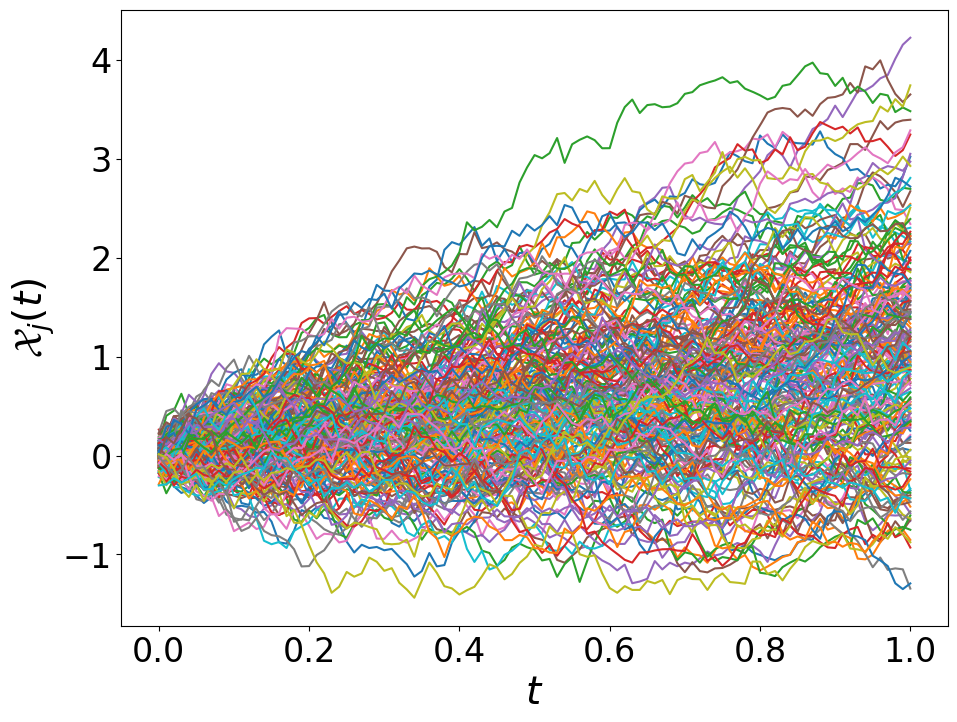

In [17]:
zzz = X_train_grid_brow.plot()
zzz.axes[0].tick_params(axis='x', labelsize=24)
zzz.axes[0].tick_params(axis='y', labelsize=24)
zzz.axes[0].set_xlabel(r"$t$", fontsize=28)
zzz.axes[0].set_ylabel(r"$\mathcal{X}_j(t)$", fontsize=28)
zzz.figure.set_size_inches(fig_size)
zzz.figure.set_facecolor("none")
zzz.axes[0].set_facecolor("white")
zzz.figure.savefig(os.path.join(images_path, "all_functions_brownian.pdf"), format="pdf")
#brownian_size = zzz.figure.get_size_inches()
#plt.close()

# Plot a single example for Brownian

In [18]:
idx = np.argmax(paper_figures_tools_brow.X[:, -1])
ylim = zzz.axes[0].get_ylim()
xlim = zzz.axes[0].get_xlim()

(101, 3, 2)


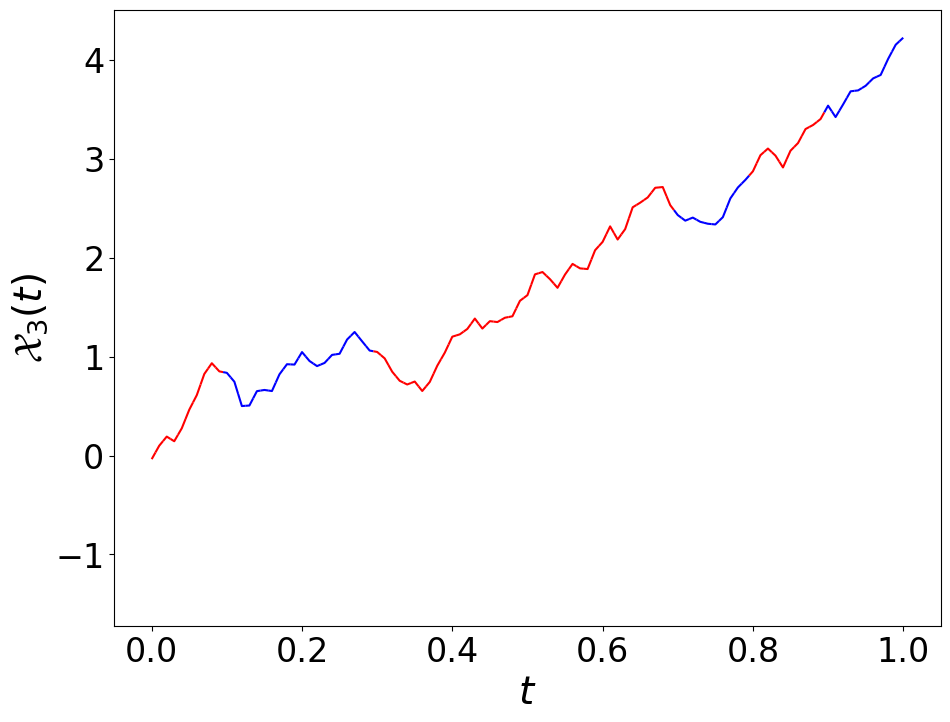

In [20]:
#fun_to_print = np.reshape(paper_figures_tools_brow.X[76], newshape=(1, -1))
#data_to_print = [np.column_stack((paper_figures_tools_brow.abscissa_points, y)) for y in fun_to_print]
cm = LinearSegmentedColormap.from_list(
    "Custom",
    [(1, 0, 0), (0, 0, 1)],
    N=2
)
colors = [1 if ab in available_intervals else 0 for ab in mapping_abscissa_interval]
fig, ax = plt.subplots()
colored_line(
    paper_figures_tools_brow.abscissa_points,
    paper_figures_tools_brow.X[idx],
    c=colors,
    ax=ax,
    cmap=cm
)

ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_xlabel(r"$t$", fontsize=28)
ax.set_ylabel(r"$\mathcal{X}_3(t)$", fontsize=28)
fig.set_size_inches(fig_size)
ax.set_facecolor("white")
fig.set_facecolor("none")
fig.savefig(os.path.join(images_path, "example_fn_brownian.pdf"), format="pdf")
#plt.close()

(101, 3, 2)


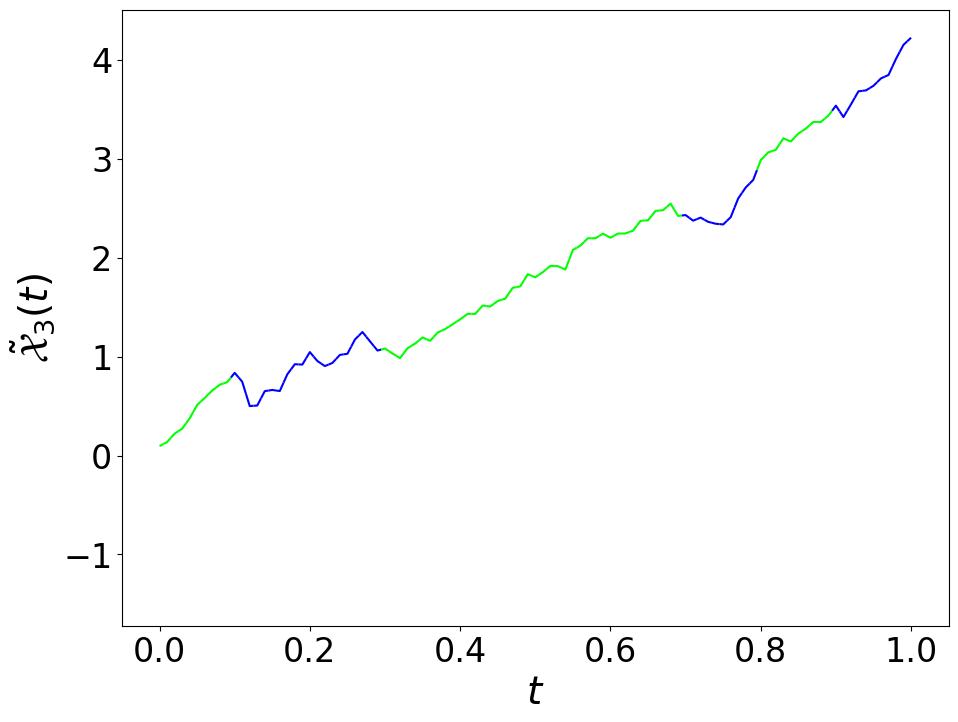

In [21]:
cm = LinearSegmentedColormap.from_list(
    "Custom",
    [(0, 1, 0), (0, 0, 1)],
    N=2
)
fig, ax = plt.subplots()
colored_line(
    paper_figures_tools_brow.abscissa_points,
     X_recreated_brow[idx],
    c=colors,
    ax=ax,
    cmap=cm
)

ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.set_xlabel(r"$t$", fontsize=28)
ax.set_ylabel(r"$\tilde{\mathcal{X}}_3(t)$", fontsize=28)
fig.set_size_inches(fig_size)
ax.set_facecolor("white")
fig.set_facecolor("none")
fig.savefig(os.path.join(images_path, "example_recreated_fn_brownian.pdf"), format="pdf")

# Create Fouririer Expansion

In [22]:
# Prepare some global parameters used to generate data
cnt = 30
alpha_p =  1 * cnt
beta_p = 3 * cnt
positions = [0.15, 0.35, 0.55, 0.85]
n_basis_simulated_data = 31
sample_size = 200

np.random.seed(1234)
X_fourier, phi_X_fourier, epsilon_fourier, beta_data_fourier, col_indexes_bct_fourier, target_fourier = fda_simulator.simulate(
    type_covariate="fourier_expansion",
    type_transformation="linear_unimodal",
    sample_size=sample_size,
    eta=0.25,
    datasets_type = ["train"],
    # Series representation
    n_basis_simulated_data=n_basis_simulated_data,
    sd_x=0.01,
    # Beta parameters
    alpha_param=alpha_p,
    beta_param=beta_p,
    # Brownian parameters
    intercept_brownian=0,
    slope_brownian=1,
    positions=positions
)

In [23]:
X_train_fourier = X_fourier[0]
target_train_fourier = target_fourier[0]
beta_train_fourier = beta_data_fourier[0]
epsilon_train_fourier = epsilon_fourier[0]
X_train_grid_fourier = fda_simulator.to_fdata_grid(X_train_fourier)

# Create symmetric Fouririer Expansion

In [24]:
# Prepare some global parameters used to generate data
cnt = 30
alpha_p =  1 * cnt
beta_p = 3 * cnt
positions = [0.15, 0.35, 0.55, 0.85]
n_basis_simulated_data = 31
sample_size = 200
np.random.seed(1234)
X_sym_fourier, phi_X_sym_fourier, epsilon_sym_fourier, beta_data_sym_fourier, col_indexes_bct_sym_fourier, target_sym_fourier = fda_simulator.simulate(
    type_covariate="symmetric_fourier_expansion",
    type_transformation="linear_unimodal",
    sample_size=sample_size,
    eta=0.25,
    datasets_type = ["train"],
    # Series representation
    n_basis_simulated_data=n_basis_simulated_data,
    sd_x=0.01,
    # Beta parameters
    alpha_param=alpha_p,
    beta_param=beta_p,
    # Brownian parameters
    intercept_brownian=0,
    slope_brownian=1,
    positions=positions
)

In [25]:
X_train_sym_fourier = X_sym_fourier[0]
target_train_sym_fourier = target_sym_fourier[0]
beta_train_sym_fourier = beta_data_sym_fourier[0]
epsilon_train_sym_fourier = epsilon_sym_fourier[0]
X_train_grid_sym_fourier = fda_simulator.to_fdata_grid(X_train_sym_fourier)

# Plot Fourier and symmetric Fourier

In [26]:
fig_size

[10.666666666666668, 8]

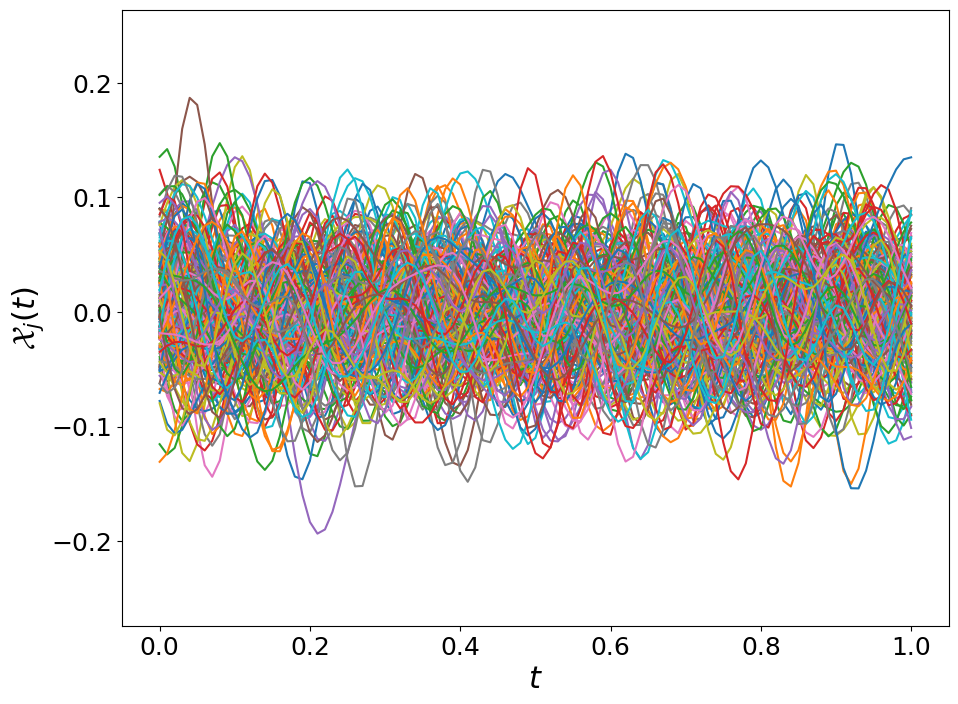

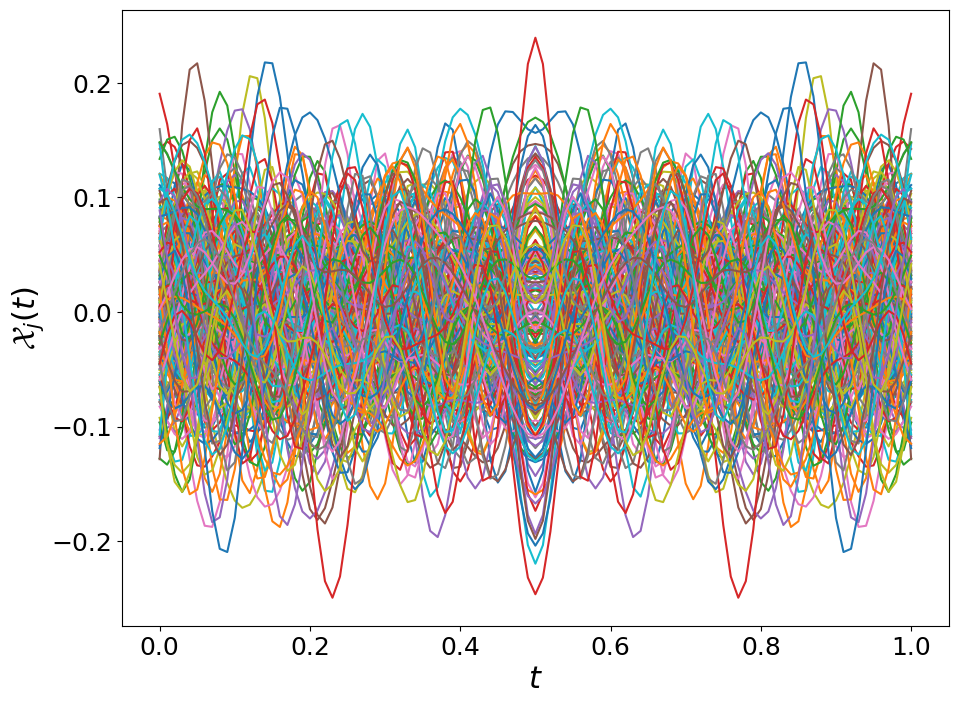

In [27]:
fourier_plot = X_train_grid_fourier.plot()
sym_fourier_plot = X_train_grid_sym_fourier.plot()
y_lim_fourier = fourier_plot.axes[0].get_ylim()
y_lim_sym_fourier = sym_fourier_plot.axes[0].get_ylim()
new_lim = (min(y_lim_fourier[0], y_lim_sym_fourier[0]), max(y_lim_fourier[1], y_lim_sym_fourier[1]))
fourier_plot.axes[0].tick_params(axis='x', labelsize=18)
fourier_plot.axes[0].tick_params(axis='y', labelsize=18)
fourier_plot.axes[0].set_xlabel(r"$t$", fontsize=22)
fourier_plot.axes[0].set_ylabel(r"$\mathcal{X}_j(t)$", fontsize=22)
fourier_plot.axes[0].set_ylim(new_lim)
fourier_plot.figure.set_size_inches(fig_size)
sym_fourier_plot.axes[0].tick_params(axis='x', labelsize=18)
sym_fourier_plot.axes[0].tick_params(axis='y', labelsize=18)
sym_fourier_plot.axes[0].set_xlabel(r"$t$", fontsize=22)
sym_fourier_plot.axes[0].set_ylabel(r"$\mathcal{X}_j(t)$", fontsize=22)
sym_fourier_plot.axes[0].set_ylim(new_lim)
sym_fourier_plot.figure.set_size_inches(fig_size)

In [28]:
fourier_plot.figure.set_facecolor("none")
fourier_plot.axes[0].set_facecolor("white")
sym_fourier_plot.figure.set_facecolor("none")
sym_fourier_plot.axes[0].set_facecolor("white")
fourier_plot.savefig(os.path.join(images_path, "all_functions_fourier.pdf"), format="pdf")
sym_fourier_plot.savefig(os.path.join(images_path, "all_functions_symmetric_fourier.pdf"), format="pdf")